# Amazon Recommendation Review Dataset Analyzer

In [1]:
import gzip
import json

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
review_dataset_folder_path = "../dataset/amazon_beauty/All_Beauty.json.gz"

In [7]:
def print_boxplot(title, data):
    fig1, ax1 = plt.subplots(figsize=(16,4))
    ax1.set_title(title)
    ax1.boxplot(data, showfliers=False, vert=False)

    plt.show()

In [8]:
def parse(path):
    """
    This function reads Amazon json gz file from given path.

    :param path     : The path of the Amazon dataset folder.
    """

    g = gzip.open(path, 'r')
    for line in g:
        yield json.loads(line)
        
def convert_to_df(path):
    """
    Generates a dataframe from Amazon dataset folder.

    :param path     : Amazon dataset path
    :return         : A dataframe
    """

    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

review_df = convert_to_df(review_dataset_folder_path)

In [9]:
review_df.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5.0,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5.0,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN
5,5.0,False,"02 26, 2010",A36NF437WZLQ9E,0143026860,W. Powell,Today I gave a book about the Negro Leagues of...,The Gift of Black Baseball,1267142400,4,NaN,NaN
6,4.0,False,"03 7, 2001",A10Q8NIFOVOHFV,0143026860,Robert S. Clay Jr.,The story of race relations in American histor...,"Baseball, America, and racism.",983923200,14,NaN,NaN
7,1.0,True,"04 10, 2017",A26PO1B2Q2G1CS,014789302X,Jacqueline Diaz,I didn't like this product it smudged all unde...,One Star,1491782400,NaN,NaN,NaN
8,5.0,True,"01 3, 2017",AQ812VYVTC2RJ,014789302X,Khadijah Ali-Evans,I simply love the product. I appreciate print ...,Five Stars,1483401600,NaN,NaN,NaN
9,1.0,True,"11 19, 2016",AMACNEW14ADMX,014789302X,rabiyaa123,it burns your eyes when u put it on and very ...,i do not recommend.,1479513600,3,NaN,NaN


### Review Dataset Basic Stats

In [10]:
distinct_user_count = len(review_df["reviewerID"].unique())
print("Distinct user count: " + str(distinct_user_count))

distinct_item_count = len(review_df["asin"].unique())
print("Distinct item count: " + str(distinct_item_count))

total_review_count = len(review_df)
print("Total review count: " + str(total_review_count))


Distinct user count: 324038
Distinct item count: 32586
Total review count: 371345


### Filtered Dataset Basic Stats

In [11]:
#remove users with less than 5 reviews
filtered_df = review_df.groupby(by="reviewerID").filter(lambda x: len(x) >= 5)

distinct_user_count = len(filtered_df["reviewerID"].unique())
print("Distinct user count: " + str(distinct_user_count))

distinct_item_count = len(filtered_df["asin"].unique())
print("Distinct item count: " + str(distinct_item_count))

total_review_count = len(filtered_df)
print("Total review count: " + str(total_review_count))

Distinct user count: 1398
Distinct item count: 1722
Total review count: 8109


### Filtered Dataset Per User Stats

Mean review count per user: 5.8004291845493565
Median review count per user: 5.0


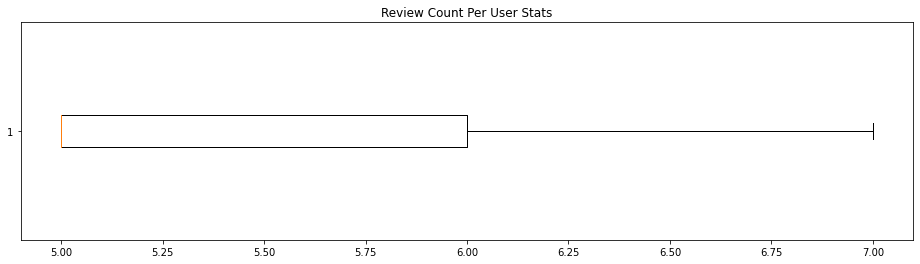

In [13]:
review_counts_per_user = filtered_df.groupby(by="reviewerID")["overall"].count()
mean_review_per_user = review_counts_per_user.mean()
print("Mean review count per user: " + str(mean_review_per_user))

median_review_per_user = review_counts_per_user.median()
print("Median review count per user: " + str(median_review_per_user))

print_boxplot('Review Count Per User Stats', review_counts_per_user)

<AxesSubplot:>

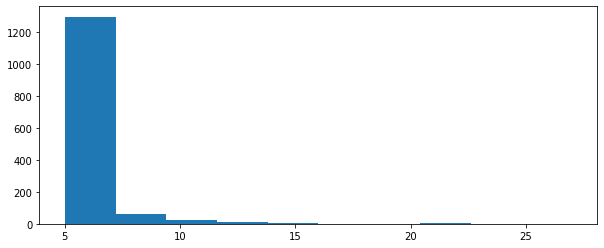

In [14]:
review_counts_per_user.hist(grid = False, bins=10, figsize=(10,4))

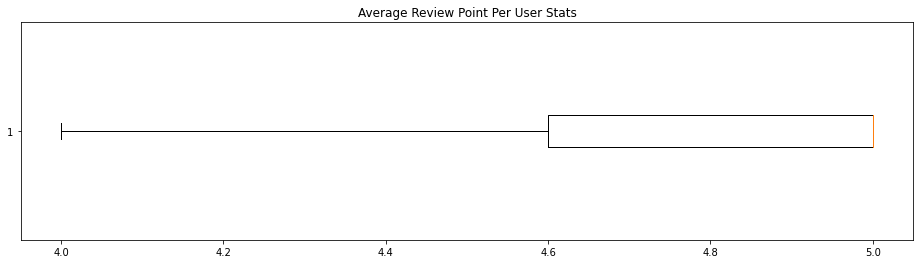

In [15]:
avg_point_per_user = filtered_df.groupby(by="reviewerID")["overall"].mean()
print_boxplot('Average Review Point Per User Stats', avg_point_per_user)

### Filtered Dataset Per Item Stats 

Mean review count per item: 4.709059233449477
Median review count per item: 1.0


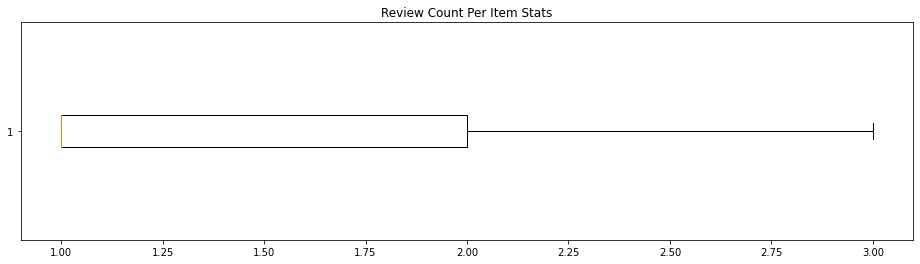

In [16]:
review_counts_per_item = filtered_df.groupby(by="asin")["overall"].count()
mean_review_per_item = review_counts_per_item.mean()
print("Mean review count per item: " + str(mean_review_per_item))

median_review_per_item = review_counts_per_item.median()
print("Median review count per item: " + str(median_review_per_item))
      
print_boxplot('Review Count Per Item Stats', review_counts_per_item)

<AxesSubplot:>

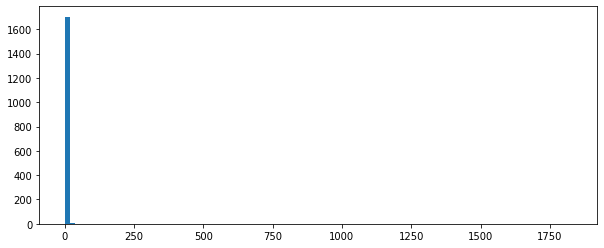

In [19]:
review_counts_per_item.hist(grid = False, bins=100, figsize=(10,4))

In [ ]:
avg_point_per_item = filtered_df.groupby(by="asin")["overall"].mean()
print_boxplot('Average Review Point Per Item Stats', avg_point_per_item)

In [ ]:
#Review Word Count Avg. Hesapla